In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('kc_house_data.csv')
df.head()
df.isnull().any()
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


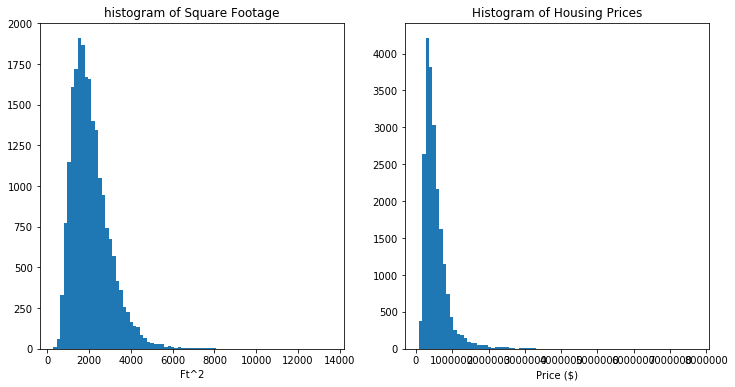

In [11]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
const = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("histogram of Square Footage")
const.hist(df.price, bins=80)
const.set_xlabel('Price ($)')
const.set_title("Histogram of Housing Prices")

plt.show()

In [14]:
# ordinary least squares module
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
#Linear regression syntax using the osl
# reg = osl(dependent variable ~ independent variable(s), dataframe).fit()
m = ols('price ~ sqft_living', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:26:14   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

In [19]:
# we can predict that for every additional 100 square-feet house, that house will be 28000
# reg = osl (Depndant variable ~ ivar1 + ivar2 + ivar3 + ivarN, dataframe).fit()
m = ols('price ~ sqft_living + bedrooms + grade + condition', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6749.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:27:54   Log-Likelihood:            -2.9884e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21608   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.398e+05   1.81e+04    -40.855      

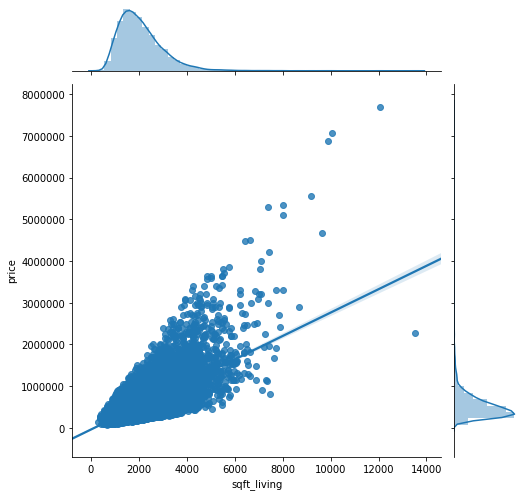

In [21]:
#joint plot using seaborn
sns.jointplot(x="sqft_living", y="price", data=df, kind='reg', fit_reg=True, height=7)
plt.show()